# Modeling and Simulation in Python
Allen B Downey

Working through this book. Notes from reading and example code. Implementing things without using the class package.

## Intro

**This book's immediate goal:** writing simulations of physical systems

In [1]:
import numpy as np
import scipy as sp
import matplotlib as plt
import pandas as pd
import sympy as sym
import pint as pt

## Modeling

*All models are wrong, but some are useful*
    -George Box

**abstraction:** deciding what details can be left out
**a model** description of a system that includes only the features we think are essential. the goal of the modeling process is to find the model best suited to its purpose (prediction, explanation, or design)

**often a simple model is better.** if we include only the essential features and leave out the rest,we get models that are easier to work with, and the explanations they provide can be cleaer and more compelling. start with a simple model, even if it is too simple, and test whether it is good enough  for its purpose.


In [2]:
from pint import UnitRegistry
unitsR = UnitRegistry()

#penny falling from the empire state building
a = 9.8 * unitsR.meter / unitsR.second**2
print( a )
print( a.units )
print( a.dimensionality )

9.8 meter / second ** 2
meter / second ** 2
[length] / [time] ** 2


In [3]:
h = 381 * unitsR.meter
t = np.sqrt( 2 * h / a )
v = round( a * t, 2 )
print( v )

86.42 meter / second


In [4]:
#convert to miles/hour
mile = unitsR.mile
hour = unitsR.hour
round( v.to(mile/hour), 2 )

193.32 <Unit('mile / hour')>

In [5]:
#if same dimensionality, will convert to units of first variable
foot = unitsR.foot
pole_height = 10 * foot

In [6]:
pole_height + h

1260.0 <Unit('foot')>

In [7]:
h + pole_height

384.048 <Unit('meter')>

In [8]:
#but what about terminal velocity?
#How long will it take a penny to land from the top of the 
#empire state building when we take into account that the penny 
#reaches a terminal velocity of 18 meters/second?
meter = unitsR.meter
second = unitsR.second

# How long until the penny reaches 18 m/s with constant acceleration a.
termV = 18 * meter / second
time2termV = termV / a

# How far would the penny fall during that time?
dist2termV = a * time2termV**2 / 2

# How long to fall the remaining distance 
#with constant velocity 18 m/s?
remainingDist = h - dist2termV
timeRemainingDist = remainingDist / termV

# STotal time for penny to fall 381 m
totalTime = time2termV + timeRemainingDist
totalTime

22.085034013605444 <Unit('second')>

## Bike Share 

a simple model of a bike share system.

In [9]:
#define a state object to collect state variables to simulate the bikes at each location
class State(object):
    olin = 0
    wellesley = 0   

In [10]:
#an instance 
bikeshare = State( )

In [11]:
bikeshare.wellesley = 2
bikeshare.olin = 10
vars( bikeshare )

{'wellesley': 2, 'olin': 10}

In [12]:
#a student moves a bike from olin to wellesley
bikeshare.olin -= 1
bikeshare.wellesley += 1
vars( bikeshare )

{'wellesley': 3, 'olin': 9}

In [13]:
#def a fxn to move a bike from olin to welesley & vice versa
def bike_to_wellesley():
    print( 'a bike goes to Wellesley' )
    bikeshare.olin -= 1
    bikeshare.wellesley += 1
    
def bike_to_olin():
    print( 'a bike goes to Olin' )
    bikeshare.olin += 1
    bikeshare.wellesley -= 1

In [14]:
print( bikeshare.olin, bikeshare.wellesley )
bike_to_wellesley()
print( bikeshare.olin, bikeshare.wellesley )

9 3
a bike goes to Wellesley
8 4


In [15]:
print( bikeshare.olin, bikeshare.wellesley )
bike_to_olin()
print( bikeshare.olin, bikeshare.wellesley )

8 4
a bike goes to Olin
9 3


In [16]:
#return a T/F bool result with a given probability
import random

def flip( probability ):
    return random.random() < probability

In [17]:
if flip( 0.5 ): #fair coin flip
    print( 'heads' )
else:
    print( 'tails' )
        

heads


In [18]:
#simulate a time step of one minute
#the chance that a student arrives during a one minute periodis 50% at Wellesley
# " ... " 33% at Olin
def step():
    if flip( 0.5 ):
        bike_to_wellesley()
    if flip( 0.33 ):
        bike_to_olin()

In [19]:
step()
vars( bikeshare )

a bike goes to Wellesley


{'wellesley': 4, 'olin': 8}

**Generalization** adding parameters to a function is called generalization because it makes the function more general, that is, less specialized.

In [20]:
#the probabilities might change. let's rewrite the step fxn to take the propabilities as parameters
def step( p1, p2 ):
    if flip( p1 ):
        bike_to_wellesley()
    if flip( p2 ):
        bike_to_olin()    

In [21]:
step( 0.7, 0.2 )

In [22]:
for i in range( 4 ):
    bike_to_wellesley()

a bike goes to Wellesley
a bike goes to Wellesley
a bike goes to Wellesley
a bike goes to Wellesley


In [23]:
vars( bikeshare )

{'wellesley': 8, 'olin': 4}

In [24]:
np.zeros((2,2))

array([[0., 0.],
       [0., 0.]])

In [25]:
bikeshare.wellesley = 20
bikeshare.olin = 20
num_step = 30

rOlin = pd.Series(np.zeros(num_step))
rWellesley = pd.Series(np.zeros(num_step))

for i in range( num_step ):
    step( 0.3, 0.2 )
    rOlin[i] = bikeshare.olin
    rWellesley[i] = bikeshare.wellesley

a bike goes to Olin
a bike goes to Olin
a bike goes to Olin
a bike goes to Wellesley
a bike goes to Wellesley
a bike goes to Olin
a bike goes to Olin
a bike goes to Olin
a bike goes to Olin
a bike goes to Olin
a bike goes to Wellesley
a bike goes to Wellesley
a bike goes to Wellesley
a bike goes to Wellesley
a bike goes to Olin
a bike goes to Wellesley
a bike goes to Wellesley
a bike goes to Olin


In [26]:
print( 'Olin mean = ', str( rOlin.mean() ) )
print( 'Wellesley mean = ', str( rWellesley.mean() ) )

Olin mean =  22.9
Wellesley mean =  17.1


In [27]:
data = {'Olin':rOlin, 'Wellesley':rWellesley, 'x':range(num_step)}
df = pd.DataFrame( data )

Text(0, 0.5, 'Number of Bikes')

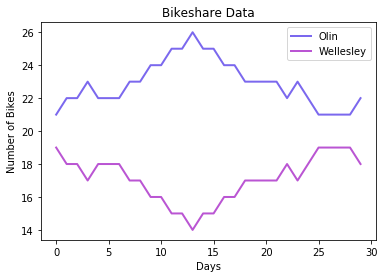

In [28]:
# multiple line plot
import matplotlib.pyplot as plt

plt.plot( 'x', 'Olin', data=df, marker='', color='mediumslateblue', linewidth=2, label="Olin")
plt.plot( 'x', 'Wellesley', data=df, marker='', color='mediumorchid', linewidth=2, label="Wellesley")
plt.legend()
plt.title('Bikeshare Data')
plt.xlabel('Days')
plt.ylabel('Number of Bikes')


## Iterative Modeling

The process we use to make models less wrong
**iterative modeling** identifying important problems, making improvements, and repeating the process. It often takes several iterations to develop a model that is good enough for the inteded purpose, but no more complicated than necessary.

In [29]:
def bike_to_wellesley( state ):
    state.olin -= 1
    state.wellesley += 1

In [30]:
bike_to_wellesley( bikeshare )

Now we  can create as many `State` objects as we want & update them independently:

In [31]:
bikeshare1 = State( )
bikeshare1.wellesley = 2
bikeshare1.olin = 10
bikeshare1.wellesley_empty = 0
bikeshare1.olin_empty = 0
print( vars( bikeshare1 ) )
bikeshare2 = State( )
bikeshare2.wellesley = 10
bikeshare2.olin = 2
bikeshare2.wellesley_empty = 0
bikeshare2.olin_empty = 0
print( vars( bikeshare2 ) )

{'wellesley': 2, 'olin': 10, 'wellesley_empty': 0, 'olin_empty': 0}
{'wellesley': 10, 'olin': 2, 'wellesley_empty': 0, 'olin_empty': 0}


In [32]:
bike_to_wellesley( bikeshare1 )
bike_to_wellesley( bikeshare2 )
print( vars( bikeshare1 ) )
print( vars( bikeshare2 ) )

{'wellesley': 3, 'olin': 9, 'wellesley_empty': 0, 'olin_empty': 0}
{'wellesley': 11, 'olin': 1, 'wellesley_empty': 0, 'olin_empty': 0}


### Documentation

**docstrings** a string in triple-quotes that appears at the beginning of a function and information on how to use the function:
1. The first line is a single sentence that describes what the fxn does
2. The following lines tell what each of the parameters are

**comments** use liberally to explain something that would not be obvious to somene reading the program.

In [33]:
def bike_to_olin( state ):
    """Move one bike from Wellesley to Olin.
    
    state: State object"""
    #We decrease one state variable and increase the other,
    #so the total number of bikes is unchanged.
    if state.wellesley == 0:
        state.wellesley_empty += 1
        return
    state.wellesley -= 1
    state.olin += 1

In [34]:
def bike_to_wellesley( state ):
    """Move one bike from Olin to Wellesley.
    
    state: State object"""
    #We decrease one state variable and increase the other,
    #so the total number of bikes is unchanged.
    if state.olin == 0:
        state.olin_empty += 1
        return
    state.wellesley += 1
    state.olin -= 1

Python Comparison Operators

|       Operation       | Symbol |
|:---------------------:|:------:|
|       Less than       |    <   |
|      Greater than     |    >   |
|   Less than or equal  |   <=   |
| Greater than or equal |   >=   |
|         Equal         |   ==   |
|       Not equal       |   !=   |

### Metrics

**stochastic** events are random  
**deterministic** events do the same thing every time they run

In [35]:
def run_simulation( state, p1, p2, num_steps ):
    """Simulate the given number of time steps
    state: State Object
    p1: probability of Olin->Wellesley customer arrival
    p2: probability of Wellesley->Olin customer arrival
    num_steps: number of time steps
    """
    rOlin = pd.Series(np.zeros(num_step))
    rWellesley = pd.Series(np.zeros(num_step))

    for i in range( num_step ):
        step( state, p1, p2 )
        rOlin[i] = state.olin
        rWellesley[i] = state.wellesley
        
    plt.plot(rOlin, label= ' Olin ' )  
    plt.plot(rWellesley, label= ' Wellesley ' )  
        

def step( state, p1, p2 ):
    """simulate a single time step
    state: State Object
    p1: probability of Olin->Wellesley customer arrival
    p2: probability of Wellesley->Olin customer arrival
    """
    if flip( p1 ):
        bike_to_wellesley( state )
    if flip( p2 ):
        bike_to_olin( state )         

initial state:  {'wellesley': 2, 'olin': 50, 'wellesley_empty': 0, 'olin_empty': 0}


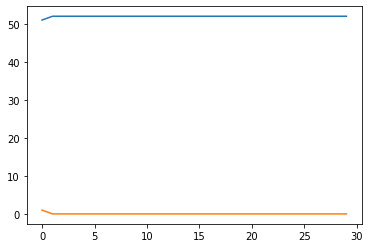

In [36]:
bikeshare1 = State( )
bikeshare1.wellesley = 2
bikeshare1.olin = 50
bikeshare1.wellesley_empty = 0
bikeshare1.olin_empty = 0
print( 'initial state: ', vars( bikeshare1 ) )

run_simulation( bikeshare1, 0.1, 0.8, 200 )

In [37]:
print( bikeshare1.olin_empty, bikeshare1.wellesley_empty )

0 20


because this little simulation is stochastic, the results are different every time they are run.

## Sweeping Parameters


In [45]:
def run_simulation( p1, p2, num_steps ):
    """Simulate the given number of time steps
    p1: probability of Olin->Wellesley customer arrival
    p2: probability of Wellesley->Olin customer arrival
    num_steps: number of time steps
    """
    state = State( )
    state.wellesley = 2
    state.olin = 10
    state.wellesley_empty = 0
    state.olin_empty = 0

    for i in range( num_step ):
        step( state, p1, p2 ) 
        
    return state    

In [46]:
state = run_simulation( 0.2, 0.4, 20 )

In [48]:
print( state.olin_empty, state.wellesley_empty )

0 9


In [50]:
#using linspace
p1_array = np.linspace( 0, 1, 5 )

for p1 in p1_array:
    print( p1 )

0.0
0.25
0.5
0.75
1.0


**Sweeping a Parameter:** run simulations as a function of a range of values for one parameter to observe the effects on a different parameter.

In [51]:
p1_array = np.linspace( 0,1,11 )
p2 = 0.2
num_steps = 60

for p1 in p1_array:
    state = run_simulation( p1, p2, num_steps )
    print( p1, state.olin_empty )

0.0 0
0.1 0
0.2 0
0.30000000000000004 0
0.4 0
0.5 1
0.6000000000000001 4
0.7000000000000001 7
0.8 8
0.9 12
1.0 18


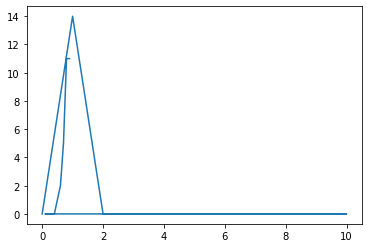

In [57]:
sweep_p1 = pd.Series(np.zeros(len(p1_array)))

for p1 in p1_array:
    state = run_simulation( p1, p2, num_steps )
    sweep_p1[p1] = state.olin_empty
    
plt.plot( sweep_p1, label="Olin")    

### Incremental Development

1. Always start with a working program. Run it and confirm that it does what you'd like
2. Make one small testable change at a time. Check by rerunning the program
3. Does the program run? If so, move on to the next change to be made. If not, go back and debug.
4. Sometimes you have to write extra code to verify/visualize that the changes you made work. such code is called **scaffolding**

## World Population

try to explain world population growth since 1950 and generate predictions for the next 50-100 years.

In [58]:
from pandas import read_html
filename = '/home/bonzilla/Desktop/MSDS2020/DATA604_SimPy/ModSimPy/ModSimPy/notebooks/data/World_population_estimates.html'

tables = read_html( filename, header=0, index_col=0, decimal = 'M')

In [61]:
len( tables )

6

In [64]:
table2 = tables[2]
table2.columns = [ 'census' , 'prb' , 'un' , 'maddison' , 'hyde' , 'tanton' , 
                  'biraben' , 'mj' , 'thomlinson' , 'durand' , 'clark' ]
table2.head()

,census,prb,un,maddison,hyde,tanton,biraben,mj,thomlinson,durand,clark
Year,,,,,,,,,,,
1950,2557628654,2.516000e+09,2.525149e+09,2.544000e+09,2.527960e+09,2.400000e+09,2.527000e+09,2.500000e+09,2.400000e+09,NaN,2.486000e+09
1951,2594939877,NaN,2.572851e+09,2.571663e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1952,2636772306,NaN,2.619292e+09,2.617949e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1953,2682053389,NaN,2.665865e+09,2.665959e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1954,2730228104,NaN,2.713172e+09,2.716927e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [65]:
#use dot operator to select collumns

census = pd.Series( table2.census / 1e9 )
un = pd.Series( table2.un /1e9 )

#1e9 is a less error prone way of writing 1000000000, a billion

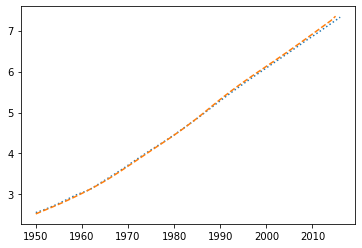

In [67]:
plt.plot( census, ':', label = 'US Census')
plt.plot( un, '--', label = 'UN DESA')

### Constant Growth Model
a roughly linear growth since 1960

In [109]:
t_0 = census.index[0]
t_end = census.index[-1]
elapsed_time = t_end - t_0

p_0 = census[t_0]
p_end = census[t_end]
total_growth = p_end - p_0

annual_growth = total_growth / elapsed_time
print( annual_growth )


0.07224800083333333


67

In [113]:
#start with the observed population from 1950 and add annual_growth each year
results = sweep_p1 = pd.Series(np.zeros(len(census)))
results[0] = p_0

for t in np.linspace( 0, len(census)-1, len(census)-1, endpoint=False ):
    #print(t)
    results[t+1] = results[t] + annual_growth
    
#results 
census

df = pd.DataFrame({'time':list(census.index[:]), 
                   'censusDat': list(census[:]), 
                   'linearFit': list(results[:]),
                   'unDat': list(un[:])})
df.head()

,time,censusDat,linearFit,unDat
0,1950,2.557629,2.557629,2.525149
1,1951,2.594940,2.629877,2.572851
2,1952,2.636772,2.702125,2.619292
3,1953,2.682053,2.774373,2.665865
4,1954,2.730228,2.846621,2.713172


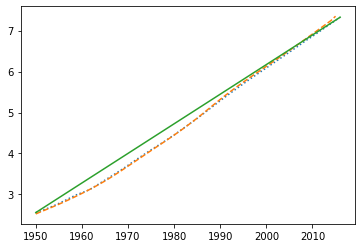

In [114]:
plt.plot( df.time, df.censusDat, ':', label = 'US Census')
plt.plot( df.time, df.unDat, '--', label = 'UN DESA')
plt.plot( df.time, df.linearFit, label = 'Linear Growth')